In [1]:
import numpy as np
import pandas as pd
import plotter
pd.set_option('display.max_rows', 110)

In [2]:
dataFrame = pd.read_csv('inputs/railway.csv')
dataFrame_localTrain = dataFrame[dataFrame['type']=='D']
# 不考慮半夜才進站的收班車
dataFrame_localTrain = dataFrame_localTrain[dataFrame_localTrain['time']>='01:30']
dataFrame_localTrain

,Station,direction,id,date,time,num,dest,delay,type
1,Zhongli,0,2,2021/01/20,05:49,1109,Hsinchu,1.0,D
2,Zhongli,0,3,2021/01/20,06:05,2011,Changhua,0.0,D
3,Zhongli,0,4,2021/01/20,06:26,1107,Miaoli,0.0,D
4,Zhongli,0,5,2021/01/20,06:45,2133,Chiayi,0.0,D
6,Zhongli,0,7,2021/01/20,07:14,1117,Miaoli,0.0,D
...,...,...,...,...,...,...,...,...,...
321013,Kaohsiung,1,91,2021/04/06,22:13,3288,Yongkang,0.0,D
321014,Kaohsiung,1,92,2021/04/06,22:20,3088,Xinzuoying,1.0,D
321015,Kaohsiung,1,93,2021/04/06,22:34,3292,Tainan,0.0,D
321016,Kaohsiung,1,94,2021/04/06,22:55,3294,Tainan,0.0,D


## 尖峰時段dataFrame

### 先抓取上班時段

In [3]:
dataFrame_localTrain_onWork = dataFrame_localTrain[dataFrame_localTrain['time'] >= '06:00']
dataFrame_localTrain_onWork = dataFrame_localTrain_onWork[dataFrame_localTrain_onWork['time'] <= '08:00']
dataFrame_localTrain_onWork

,Station,direction,id,date,time,num,dest,delay,type
2,Zhongli,0,3,2021/01/20,06:05,2011,Changhua,0.0,D
3,Zhongli,0,4,2021/01/20,06:26,1107,Miaoli,0.0,D
4,Zhongli,0,5,2021/01/20,06:45,2133,Chiayi,0.0,D
6,Zhongli,0,7,2021/01/20,07:14,1117,Miaoli,0.0,D
7,Zhongli,0,8,2021/01/20,07:29,1121,Hsinchu,2.0,D
...,...,...,...,...,...,...,...,...,...
320929,Kaohsiung,1,7,2021/04/06,06:39,3138,Houli,0.0,D
320931,Kaohsiung,1,9,2021/04/06,07:08,3140,Xinzuoying,0.0,D
320933,Kaohsiung,1,11,2021/04/06,07:28,3142,Chiayi,0.0,D
320934,Kaohsiung,1,12,2021/04/06,07:37,3054,Xinzuoying,0.0,D


### 下班時段

In [4]:
dataFrame_localTrain_offWork = dataFrame_localTrain[dataFrame_localTrain['time'] >= '17:00']
dataFrame_localTrain_offWork = dataFrame_localTrain_offWork[dataFrame_localTrain_offWork['time'] <= '20:00']
dataFrame_localTrain_offWork

,Station,direction,id,date,time,num,dest,delay,type
57,Zhongli,0,57,2021/01/20,17:12,1217,Miaoli,0.0,D
58,Zhongli,0,58,2021/01/20,17:21,4183,Hukou,6.0,D
59,Zhongli,0,59,2021/01/20,17:35,1221,Hsinchu,1.0,D
61,Zhongli,0,61,2021/01/20,17:52,2243,Chiayi,1.0,D
62,Zhongli,0,62,2021/01/20,18:01,1227,Miaoli,1.0,D
...,...,...,...,...,...,...,...,...,...
320996,Kaohsiung,1,74,2021/04/06,18:42,3334,Xinzuoying,4.0,D
320997,Kaohsiung,1,75,2021/04/06,18:54,3258,Ershui,0.0,D
321000,Kaohsiung,1,78,2021/04/06,19:17,3082,Xinzuoying,0.0,D
321002,Kaohsiung,1,80,2021/04/06,19:36,3262,Houli,0.0,D


### 將上班時段和下班時段合併，便得到尖峰時段的dataFrame

In [5]:
dataFrame_localTrain_onPeak = pd.concat([dataFrame_localTrain_onWork, dataFrame_localTrain_offWork])
dataFrame_localTrain_onPeak.sort_values(by=['Station','date','time'], inplace=True)
dataFrame_localTrain_onPeak.reset_index(inplace=True)
dataFrame_localTrain_onPeak

,index,Station,direction,id,date,time,num,dest,delay,type
0,144407,Banqiao,0,6,2021/01/20,06:06,2133,Chiayi,0.0,D
1,156380,Banqiao,1,7,2021/01/20,06:23,1112,Keelung,1.0,D
2,144409,Banqiao,0,8,2021/01/20,06:28,1117,Miaoli,0.0,D
3,156382,Banqiao,1,9,2021/01/20,06:37,4144,Ruifang,1.0,D
4,156383,Banqiao,1,10,2021/01/20,06:42,1120,Keelung,1.0,D
...,...,...,...,...,...,...,...,...,...,...
67902,224978,Zhunan,1,67,2021/04/06,19:29,2552,Hsinchu,7.0,D
67903,218426,Zhunan,0,67,2021/04/06,19:30,1227,Miaoli,7.0,D
67904,218428,Zhunan,0,69,2021/04/06,19:51,2551,Changhua,0.0,D
67905,218429,Zhunan,0,70,2021/04/06,19:57,2253,Chiayi,10.0,D


## 透過drop尖峰dataFrame的index來獲取離峰的dataFrame

In [6]:
dataFrame_localTrain_offPeak = dataFrame_localTrain.drop(index=dataFrame_localTrain_onPeak['index'])
dataFrame_localTrain_offPeak.sort_values(by=['Station','date','time'], inplace=True)
dataFrame_localTrain_offPeak.reset_index(inplace=True)
dataFrame_localTrain_offPeak

,index,Station,direction,id,date,time,num,dest,delay,type
0,156375,Banqiao,1,2,2021/01/20,05:14,4128,Su ao,0.0,D
1,144405,Banqiao,0,4,2021/01/20,05:32,2011,Changhua,0.0,D
2,156376,Banqiao,1,3,2021/01/20,05:34,1106,Keelung,0.0,D
3,144406,Banqiao,0,5,2021/01/20,05:47,1107,Miaoli,0.0,D
4,156377,Banqiao,1,4,2021/01/20,05:58,4138,Su ao,0.0,D
...,...,...,...,...,...,...,...,...,...,...
157620,224993,Zhunan,1,82,2021/04/06,23:01,2274,Beihu,6.0,D
157621,218443,Zhunan,0,84,2021/04/06,23:10,1265,Miaoli,2.0,D
157622,224994,Zhunan,1,83,2021/04/06,23:32,3248,Hsinchu,0.0,D
157623,218444,Zhunan,0,85,2021/04/06,23:35,1267,Miaoli,0.0,D


## 尖峰時段的分析

### 1. 豐原到員林的各站dataFrame

In [7]:
dataFrame_localTrain_onPeak_Fengyuan = dataFrame_localTrain_onPeak[dataFrame_localTrain_onPeak['Station']=='Fengyuan']
dataFrame_localTrain_onPeak_Taichung = dataFrame_localTrain_onPeak[dataFrame_localTrain_onPeak['Station']=='Taichung']
dataFrame_localTrain_onPeak_Xinwuri = dataFrame_localTrain_onPeak[dataFrame_localTrain_onPeak['Station']=='Xinwuri']
dataFrame_localTrain_onPeak_Chenggong = dataFrame_localTrain_onPeak[dataFrame_localTrain_onPeak['Station']=='Tanzi']
dataFrame_localTrain_onPeak_Changhua = dataFrame_localTrain_onPeak[dataFrame_localTrain_onPeak['Station']=='Changhua']
dataFrame_localTrain_onPeak_Yuanlin = dataFrame_localTrain_onPeak[dataFrame_localTrain_onPeak['Station']=='Yuanlin']

### 2. 豐原到台中(逆行)

C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target_dataFrame.sort_values(by=['date','num'], inplace=True)
C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


Modela slope:     1.008537418338609
Modela intercept: 0.03621632490386162
LinearRegression Score:  0.7853897601624993


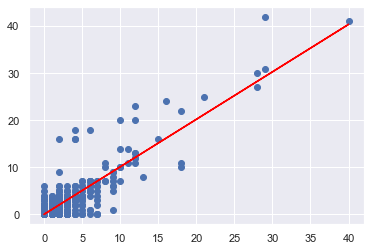

{x: -4.24206984681485, y: -4.24206984681485}
算出允許誤差
xgboost、lasso比較
xg Score:  0.8297950790257927


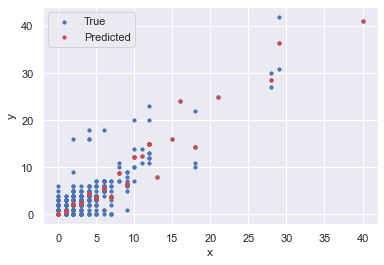

1.38290603033340


In [8]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_onPeak_Fengyuan, dataFrame_localTrain_onPeak_Taichung, 1)
plotter.plot(x,y)

### 3. 台中到新烏日(逆行)

Modela slope:     0.9071743290362779
Modela intercept: 0.5358467362696657
LinearRegression Score:  0.826986452322451


C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target_dataFrame.sort_values(by=['date','num'], inplace=True)
C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


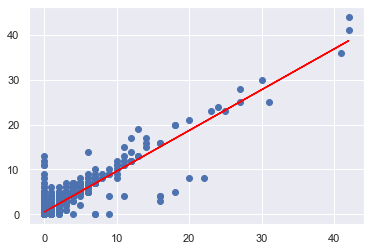

{x: 5.77261366070906, y: 5.77261366070906}
算出允許誤差
xgboost、lasso比較
xg Score:  0.8584545727132218


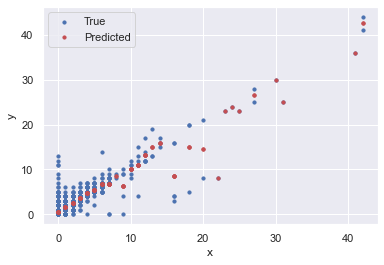

1.25098874145727


In [9]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_onPeak_Taichung, dataFrame_localTrain_onPeak_Xinwuri, 1)
plotter.plot(x,y)

### 4. 新烏日到成功(逆行)

In [10]:
# x,y = plotter.arrangeDataFrame(dataFrame_localTrain_onPeak_Xinwuri, dataFrame_localTrain_onPeak_Chenggong, 1)
# plotter.plot(x,y)

### 5. 成功到彰化(逆行)

Modela slope:     0.8954248968560643
Modela intercept: -0.2239853428850429
LinearRegression Score:  0.9221080819149965


C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target_dataFrame.sort_values(by=['date','num'], inplace=True)
C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


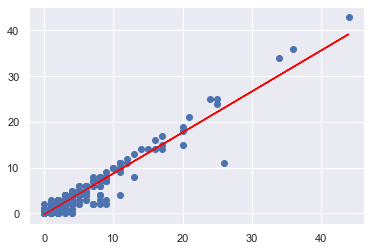

{x: -2.14186107544883, y: -2.14186107544883}
算出允許誤差
xgboost、lasso比較
xg Score:  0.949924233220209


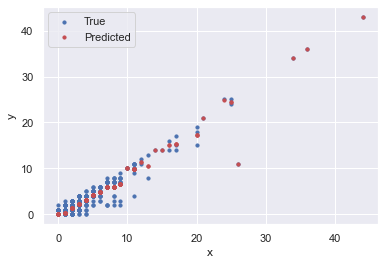

0.708785381583322


In [11]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_onPeak_Chenggong, dataFrame_localTrain_onPeak_Changhua, 1)
plotter.plot(x,y)

### 6. 彰化到員林(逆行)

Modela slope:     0.8026317932024686
Modela intercept: 0.34567481527988375
LinearRegression Score:  0.7696558726882229


C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target_dataFrame.sort_values(by=['date','num'], inplace=True)
C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


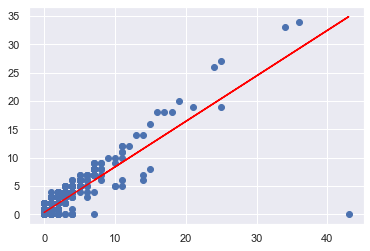

{x: 1.75142096535585, y: 1.75142096535585}
算出允許誤差
xgboost、lasso比較
xg Score:  0.9186740850242542


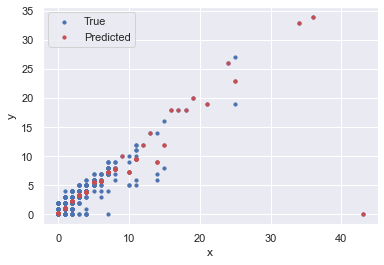

0.818258008318303


In [12]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_onPeak_Changhua, dataFrame_localTrain_onPeak_Yuanlin, 1)
plotter.plot(x,y)

### 7. 員林到彰化(順行)

Modela slope:     0.9799567739303393
Modela intercept: -0.2756580400283182
LinearRegression Score:  0.9199998051140339


C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target_dataFrame.sort_values(by=['date','num'], inplace=True)
C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


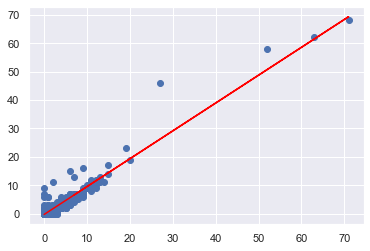

{x: -13.7531772116055, y: -13.7531772116055}
算出允許誤差
xgboost、lasso比較
xg Score:  0.9555790315387273


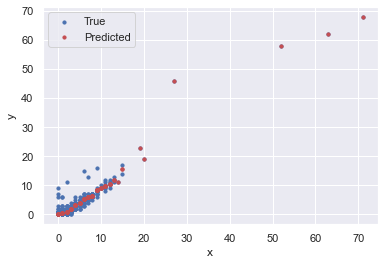

0.880026403229680


In [13]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_onPeak_Yuanlin, dataFrame_localTrain_onPeak_Changhua, 0)
plotter.plot(y,x)

### 8. 彰化到成功(順行)

Modela slope:     0.9776585559524957
Modela intercept: 0.15236543237127131
LinearRegression Score:  0.9544545059051966


C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target_dataFrame.sort_values(by=['date','num'], inplace=True)
C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


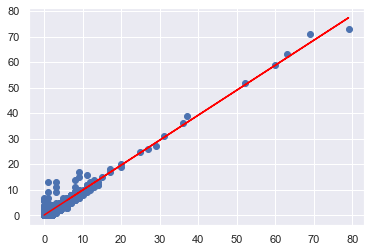

{x: 6.81985605081303, y: 6.81985605081303}
算出允許誤差
xgboost、lasso比較
xg Score:  0.9586373818816025


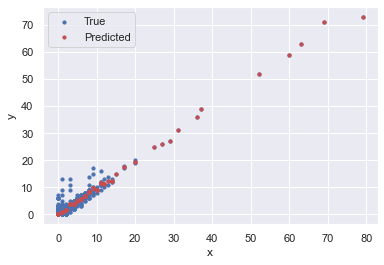

1.13474913214971


In [14]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_onPeak_Changhua, dataFrame_localTrain_onPeak_Chenggong, 0)
plotter.plot(y,x)

### 9. 成功到新烏日(順行)

Modela slope:     0.9872422599643268
Modela intercept: 0.4568903839160845
LinearRegression Score:  0.9301403123670146


C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


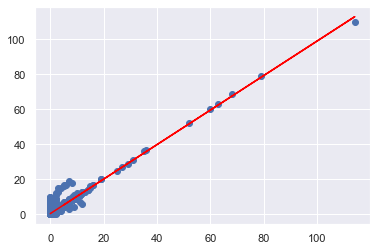

{x: 35.8127993389530, y: 35.8127993389530}
算出允許誤差
xgboost、lasso比較
xg Score:  0.9311437800570258


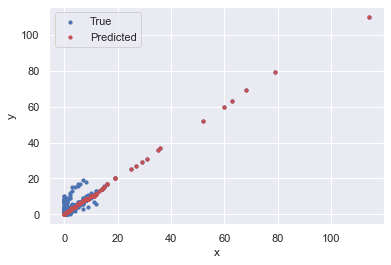

1.48866472888769


In [15]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_onPeak_Chenggong, dataFrame_localTrain_onPeak_Xinwuri, 0)
plotter.plot(y,x)

### 10. 新烏日到台中(順行)

Modela slope:     0.9984812169773429
Modela intercept: 0.33566676856981403
LinearRegression Score:  0.9601981986985414


C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target_dataFrame.sort_values(by=['date','num'], inplace=True)
C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


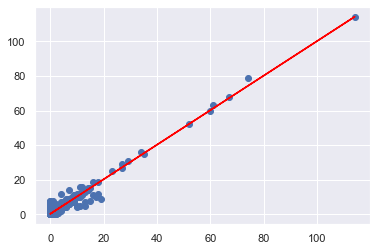

{x: 221.010350762671, y: 221.010350762671}
算出允許誤差
xgboost、lasso比較
xg Score:  0.9665875200177094


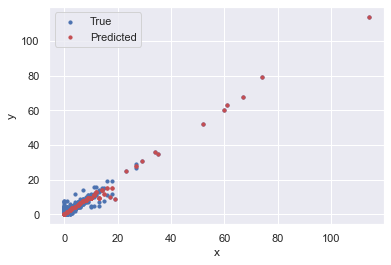

0.962075018403634


In [16]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_onPeak_Xinwuri, dataFrame_localTrain_onPeak_Taichung, 0)
plotter.plot(y,x)

### 11. 台中到豐原(順行)

Modela slope:     0.8899001760302816
Modela intercept: 0.20075255350752408
LinearRegression Score:  0.7651357706979859


C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target_dataFrame.sort_values(by=['date','num'], inplace=True)
C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


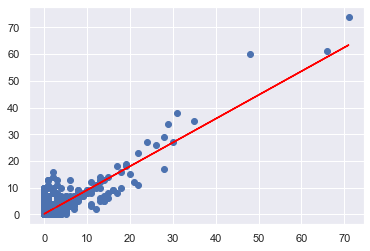

{x: 1.82336852384741, y: 1.82336852384741}
算出允許誤差
xgboost、lasso比較
xg Score:  0.8117497164938691


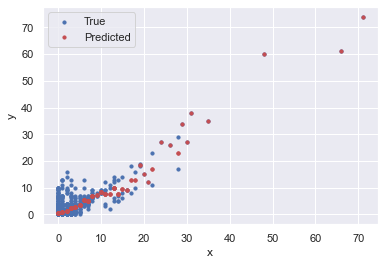

2.00955323006780


In [17]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_onPeak_Taichung, dataFrame_localTrain_onPeak_Fengyuan, 0)
plotter.plot(y,x)

## 尖峰時段的分析

### 1. 豐原到員林的各站dataFrame

In [18]:
dataFrame_localTrain_onPeak_Fengyuan = dataFrame_localTrain_onPeak[dataFrame_localTrain_onPeak['Station']=='Fengyuan']
dataFrame_localTrain_onPeak_Taichung = dataFrame_localTrain_onPeak[dataFrame_localTrain_onPeak['Station']=='Taichung']
dataFrame_localTrain_onPeak_Xinwuri = dataFrame_localTrain_onPeak[dataFrame_localTrain_onPeak['Station']=='Xinwuri']
dataFrame_localTrain_onPeak_Chenggong = dataFrame_localTrain_onPeak[dataFrame_localTrain_onPeak['Station']=='Tanzi']
dataFrame_localTrain_onPeak_Changhua = dataFrame_localTrain_onPeak[dataFrame_localTrain_onPeak['Station']=='Changhua']
dataFrame_localTrain_onPeak_Yuanlin = dataFrame_localTrain_onPeak[dataFrame_localTrain_onPeak['Station']=='Yuanlin']

### 2. 豐原到台中(逆行)

Modela slope:     1.008537418338609
Modela intercept: 0.03621632490386162
LinearRegression Score:  0.7853897601624993


C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target_dataFrame.sort_values(by=['date','num'], inplace=True)
C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


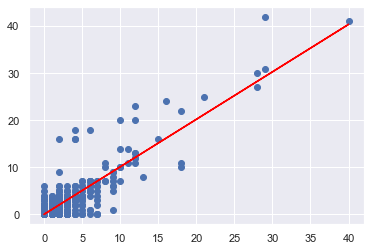

{x: -4.24206984681485, y: -4.24206984681485}
算出允許誤差
xgboost、lasso比較
xg Score:  0.8297950790257927


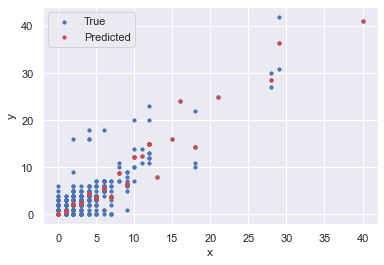

1.38290603033340


In [19]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_onPeak_Fengyuan, dataFrame_localTrain_onPeak_Taichung, 1)
plotter.plot(x,y)

### 3. 台中到新烏日(逆行)

Modela slope:     0.9071743290362779
Modela intercept: 0.5358467362696657
LinearRegression Score:  0.826986452322451


C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target_dataFrame.sort_values(by=['date','num'], inplace=True)
C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


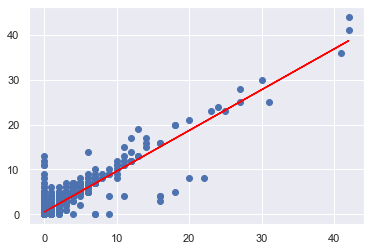

{x: 5.77261366070906, y: 5.77261366070906}
算出允許誤差
xgboost、lasso比較
xg Score:  0.8584545727132218


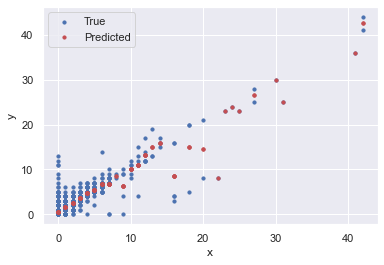

1.25098874145727


In [20]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_onPeak_Taichung, dataFrame_localTrain_onPeak_Xinwuri, 1)
plotter.plot(x,y)

### 4. 新烏日到成功(逆行)

In [21]:
# x,y = plotter.arrangeDataFrame(dataFrame_localTrain_onPeak_Xinwuri, dataFrame_localTrain_onPeak_Chenggong, 1)
# plotter.plot(x,y)

### 5. 成功到彰化(逆行)

Modela slope:     0.8954248968560643
Modela intercept: -0.2239853428850429
LinearRegression Score:  0.9221080819149965


C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target_dataFrame.sort_values(by=['date','num'], inplace=True)
C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


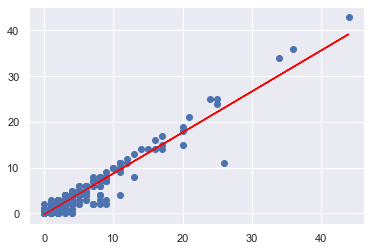

{x: -2.14186107544883, y: -2.14186107544883}
算出允許誤差
xgboost、lasso比較
xg Score:  0.949924233220209


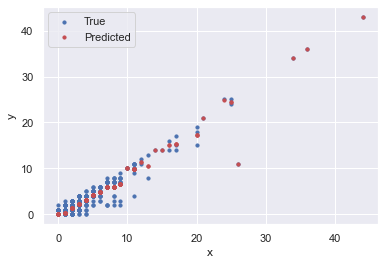

0.708785381583322


In [22]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_onPeak_Chenggong, dataFrame_localTrain_onPeak_Changhua, 1)
plotter.plot(x,y)

### 6. 彰化到員林(逆行)

Modela slope:     0.8026317932024686
Modela intercept: 0.34567481527988375
LinearRegression Score:  0.7696558726882229


C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target_dataFrame.sort_values(by=['date','num'], inplace=True)
C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


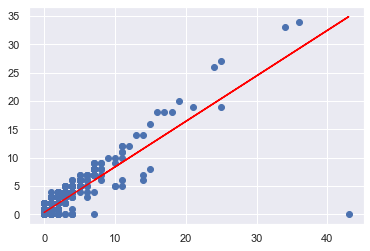

{x: 1.75142096535585, y: 1.75142096535585}
算出允許誤差
xgboost、lasso比較
xg Score:  0.9186740850242542


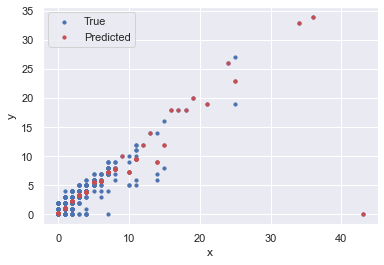

0.818258008318303


In [23]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_onPeak_Changhua, dataFrame_localTrain_onPeak_Yuanlin, 1)
plotter.plot(x,y)

### 7. 員林到彰化(順行)

Modela slope:     0.9799567739303393
Modela intercept: -0.2756580400283182
LinearRegression Score:  0.9199998051140339


C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target_dataFrame.sort_values(by=['date','num'], inplace=True)
C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


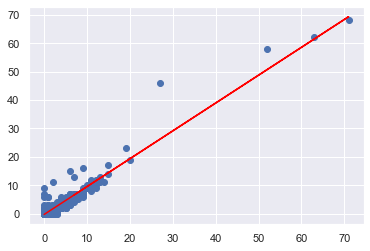

{x: -13.7531772116055, y: -13.7531772116055}
算出允許誤差
xgboost、lasso比較
xg Score:  0.9555790315387273


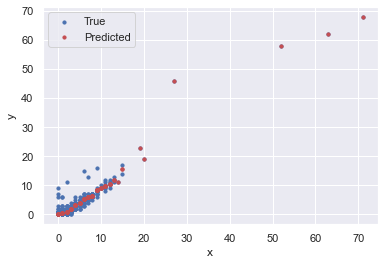

0.880026403229680


In [24]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_onPeak_Yuanlin, dataFrame_localTrain_onPeak_Changhua, 0)
plotter.plot(y,x)

### 8. 彰化到成功(順行)

Modela slope:     0.9776585559524957
Modela intercept: 0.15236543237127131
LinearRegression Score:  0.9544545059051966


C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target_dataFrame.sort_values(by=['date','num'], inplace=True)
C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


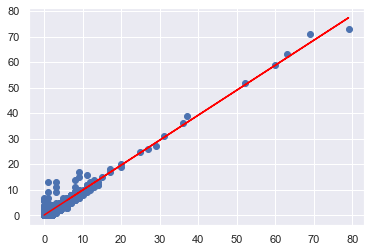

{x: 6.81985605081303, y: 6.81985605081303}
算出允許誤差
xgboost、lasso比較
xg Score:  0.9586373818816025


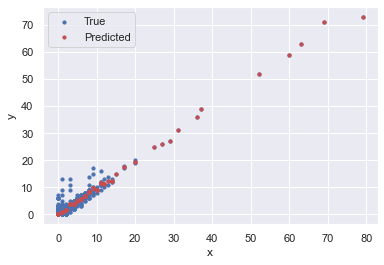

1.13474913214971


In [25]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_onPeak_Changhua, dataFrame_localTrain_onPeak_Chenggong, 0)
plotter.plot(y,x)

### 9. 成功到新烏日(順行)

Modela slope:     0.9872422599643268
Modela intercept: 0.4568903839160845
LinearRegression Score:  0.9301403123670146


C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


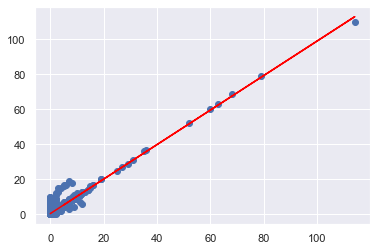

{x: 35.8127993389530, y: 35.8127993389530}
算出允許誤差
xgboost、lasso比較
xg Score:  0.9311437800570258


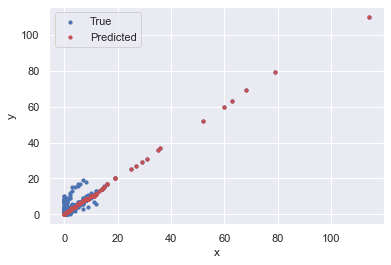

1.48866472888769


In [26]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_onPeak_Chenggong, dataFrame_localTrain_onPeak_Xinwuri, 0)
plotter.plot(y,x)

### 10. 新烏日到台中(順行)

Modela slope:     0.9984812169773429
Modela intercept: 0.33566676856981403
LinearRegression Score:  0.9601981986985414


C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target_dataFrame.sort_values(by=['date','num'], inplace=True)
C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


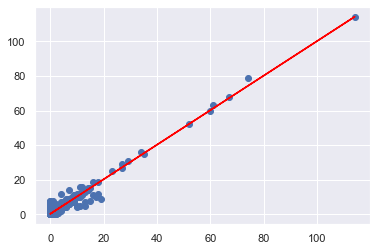

{x: 221.010350762671, y: 221.010350762671}
算出允許誤差
xgboost、lasso比較
xg Score:  0.9665875200177094


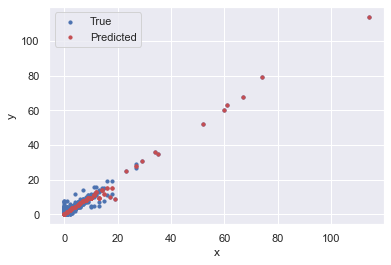

0.962075018403634


In [27]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_onPeak_Xinwuri, dataFrame_localTrain_onPeak_Taichung, 0)
plotter.plot(y,x)

### 11. 台中到豐原(順行)

Modela slope:     0.8899001760302816
Modela intercept: 0.20075255350752408
LinearRegression Score:  0.7651357706979859


C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target_dataFrame.sort_values(by=['date','num'], inplace=True)
C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


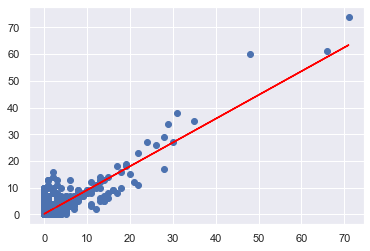

{x: 1.82336852384741, y: 1.82336852384741}
算出允許誤差
xgboost、lasso比較
xg Score:  0.8117497164938691


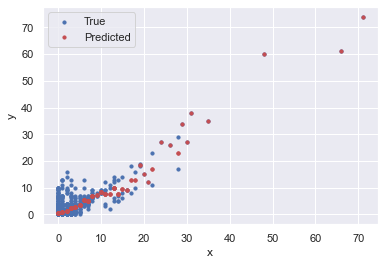

2.00955323006780


In [28]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_onPeak_Taichung, dataFrame_localTrain_onPeak_Fengyuan, 0)
plotter.plot(y,x)

## 離峰時段的分析

### 1. 豐原到員林的各站dataFrame

In [29]:
dataFrame_localTrain_offPeak_Fengyuan = dataFrame_localTrain_offPeak[dataFrame_localTrain_offPeak['Station']=='Fengyuan']
dataFrame_localTrain_offPeak_Taichung = dataFrame_localTrain_offPeak[dataFrame_localTrain_offPeak['Station']=='Taichung']
dataFrame_localTrain_offPeak_Xinwuri = dataFrame_localTrain_offPeak[dataFrame_localTrain_offPeak['Station']=='Xinwuri']
dataFrame_localTrain_offPeak_Chenggong = dataFrame_localTrain_offPeak[dataFrame_localTrain_offPeak['Station']=='Tanzi']
dataFrame_localTrain_offPeak_Changhua = dataFrame_localTrain_offPeak[dataFrame_localTrain_offPeak['Station']=='Changhua']
dataFrame_localTrain_offPeak_Yuanlin = dataFrame_localTrain_offPeak[dataFrame_localTrain_offPeak['Station']=='Yuanlin']

### 2. 豐原到台中(逆行)

In [30]:
# x,y = plotter.arrangeDataFrame(dataFrame_localTrain_offPeak_Fengyuan, dataFrame_localTrain_offPeak_Taichung, 1)
# plotter.plot(x,y)

### 3. 台中到新烏日(逆行)

In [31]:
# x,y = plotter.arrangeDataFrame(dataFrame_localTrain_offPeak_Taichung, dataFrame_localTrain_offPeak_Xinwuri, 1)
# plotter.plot(x,y)

### 4. 新烏日到成功(逆行)

Modela slope:     0.98284401442701
Modela intercept: 0.2759304179171196
LinearRegression Score:  0.914828120915438


C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target_dataFrame.sort_values(by=['date','num'], inplace=True)
C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


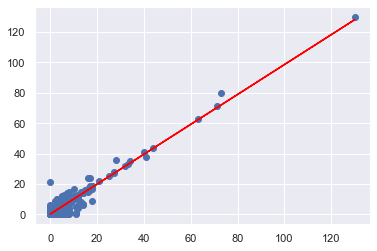

{x: 16.0836238025018, y: 16.0836238025018}
算出允許誤差
xgboost、lasso比較
xg Score:  0.9226817187068843


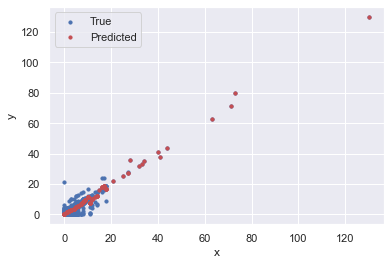

1.14895033129870


In [32]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_offPeak_Xinwuri, dataFrame_localTrain_offPeak_Chenggong, 1)
plotter.plot(x,y)

### 5. 成功到彰化(逆行)

Modela slope:     0.9377252473154033
Modela intercept: -0.23399347016447014
LinearRegression Score:  0.9645206942376103


C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target_dataFrame.sort_values(by=['date','num'], inplace=True)
C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


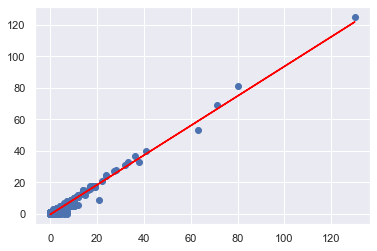

{x: -3.75743716477811, y: -3.75743716477811}
算出允許誤差
xgboost、lasso比較
xg Score:  0.9767185500486742


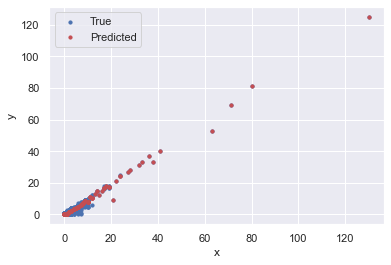

0.620245480049651


In [33]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_offPeak_Chenggong, dataFrame_localTrain_offPeak_Changhua, 1)
plotter.plot(x,y)

### 6. 彰化到員林(逆行)

Modela slope:     0.8545468912595268
Modela intercept: 0.39514605619402066
LinearRegression Score:  0.7436366307014965


C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target_dataFrame.sort_values(by=['date','num'], inplace=True)
C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


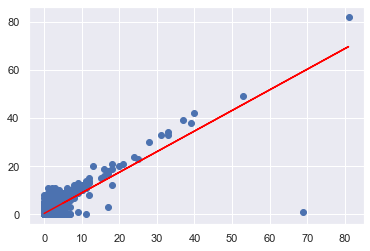

{x: 2.71665596985670, y: 2.71665596985670}
算出允許誤差
xgboost、lasso比較
xg Score:  0.867238078616827


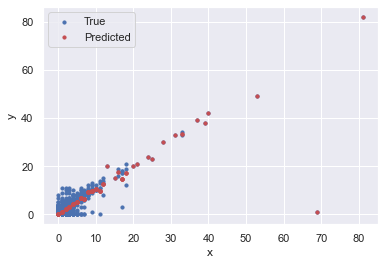

1.31558307393697


In [34]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_offPeak_Changhua, dataFrame_localTrain_offPeak_Yuanlin, 1)
plotter.plot(x,y)

### 7. 員林到彰化(順行)

In [35]:
# x,y = plotter.arrangeDataFrame(dataFrame_localTrain_offPeak_Yuanlin, dataFrame_localTrain_offPeak_Changhua, 0)
# plotter.plot(y,x)

### 8. 彰化到成功(順行)

Modela slope:     0.9844942691061016
Modela intercept: 0.2072630274425009
LinearRegression Score:  0.9602589522998259


C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target_dataFrame.sort_values(by=['date','num'], inplace=True)
C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


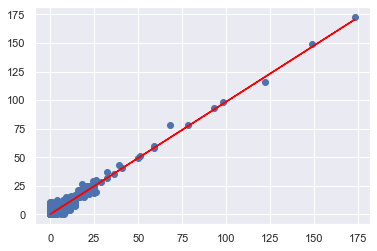

{x: 13.3668660226823, y: 13.3668660226823}
算出允許誤差
xgboost、lasso比較
xg Score:  0.9646324734881858


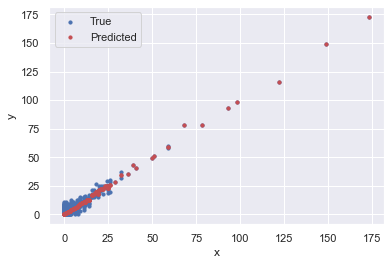

1.31493746904193


In [36]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_offPeak_Changhua, dataFrame_localTrain_offPeak_Chenggong, 0)
plotter.plot(y,x)

### 9. 成功到新烏日(順行)

Modela slope:     0.9978085008300767
Modela intercept: 0.1397882865189426
LinearRegression Score:  0.9691768103556477


C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target_dataFrame.sort_values(by=['date','num'], inplace=True)
C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


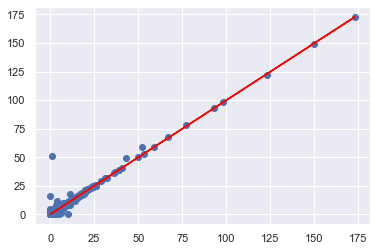

{x: 63.7866025401482, y: 63.7866025401482}
算出允許誤差
xgboost、lasso比較
xg Score:  0.9699515549457196


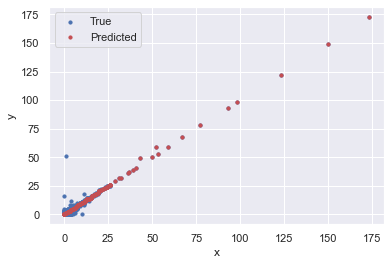

1.12495049538917


In [37]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_offPeak_Chenggong, dataFrame_localTrain_offPeak_Xinwuri, 0)
plotter.plot(y,x)

### 10. 新烏日到台中(順行)

Modela slope:     1.0051415874466552
Modela intercept: 0.43640912440656576
LinearRegression Score:  0.9462932682189878


C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target_dataFrame.sort_values(by=['date','num'], inplace=True)
C:\Users\sunlo\Desktop\大學\專題\台鐵誤點\model\plotter.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_target_dataFrame.sort_values(by=['date','num'], inplace=True)


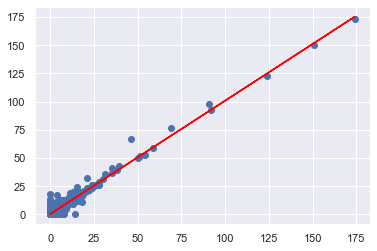

{x: -84.8782849526481, y: -84.8782849526481}
算出允許誤差
xgboost、lasso比較
xg Score:  0.9515597599848857


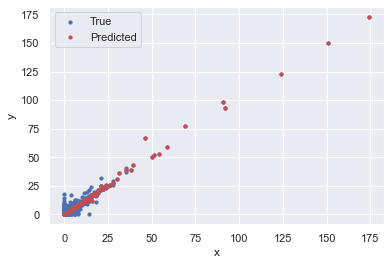

1.38821533937226


In [38]:
x,y = plotter.arrangeDataFrame(dataFrame_localTrain_offPeak_Xinwuri, dataFrame_localTrain_offPeak_Taichung, 0)
plotter.plot(y,x)

### 11. 台中到豐原(順行)

In [39]:
# x,y = plotter.arrangeDataFrame(dataFrame_localTrain_offPeak_Taichung, dataFrame_localTrain_offPeak_Fengyuan, 0)
# plotter.plot(y,x)